# **Beginners Guide to Regression Analysis and Plot Interpretations**
![](https://expertsystem.com/wp-content/uploads/2017/03/machine-learning-definition.jpeg)

## Table Of Contents:
* **Understanding Regression**
* **How Does Regression Work?**
* **Types of Algorithms**
* **Testing of Algorithms**

## Algorithms that we will consider:-
1. Simple Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression
4. Support Vestor Regression
5. Decision Tree Regression
6. Random Forest Regression

## Lets Start with Understanding what is Regression?
**Regression is a technique used to predict value of one variable(Dependent Variable) on the basis of other variables(Independent Variables). It is parametric in nature because it makes certain assumptions based on the data set. If the data set follows those assumptions, regression gives incredible results. Otherwise, it struggles to provide convincing accuracy.**

## How Does Regression Work?
**Regression is a part of supervised learning which basically means that we train our models on the basis of given training data and our model tries to relate between the dependent and the independent variable. It does this using various functions that maps the independent variables to the dependent variables. When the model is completely trained and the error is minumised then we are able to make predictions on testing data as well.**

## We can apply machine learning model by following six steps:-
* Indentifying Problem
* Analysing Data
* Preparing Data
* Evaluating Algorithm
* Improving Results
* Presenting Results

## Simple Linear Regression
**It is a basic and commonly used type of predictive analysis. These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables. 
y = a*X + b where:**
* y – Dependent Variable
* X – Independent variable
* b – intercept
* a – Slope

## Preparing Data:

In [2]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
Training_Dataset = pd.read_csv("https://raw.githubusercontent.com/manojcpatil/PythonDemo/master/Data/regression_train_data.csv")
Training_Dataset = Training_Dataset.dropna()
X_train = np.array(Training_Dataset.iloc[:, :-1].values) # Independent Variable
y_train = np.array(Training_Dataset.iloc[:, 1].values) # Dependent Variable

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)>

In [ ]:
Training_Dataset.head()

In [ ]:
Testing_Dataset = pd.read_csv("https://raw.githubusercontent.com/manojcpatil/PythonDemo/master/Data/regression_test_data.csv")
Testing_Dataset = Testing_Dataset.dropna()
X_test = np.array(Testing_Dataset.iloc[:, :-1].values) # Independent Variable
y_test = np.array(Testing_Dataset.iloc[:, 1].values) # Dependent Variable

In [ ]:
plt.scatter(X_train,y_train)

In [ ]:
# Training the Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

dataset=pd.DataFrame({
    'x':X_train.reshape(-1),
    'y':y_train
})
model = ols("y ~ x",dataset).fit()

# Print the summary
print(model.summary())
print("\n model.pvalues:\n",model.pvalues,"\n\n")
# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
anova_results

In [ ]:
print("Coefficient %f"%regressor.coef_)
print("Intercept %f"%regressor.intercept_)
accuracy = regressor.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

In [ ]:
plt.style.use('seaborn')
plt.scatter(X_test, y_test, color = 'red', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')
plt.plot(X_train, regressor.predict(X_train), color = 'blue', label='Model Plot')
plt.title('Predicted Values vs Inputs')
plt.xlabel('Inputs')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# VISUALISE DATA
import seaborn as sns
df=Training_Dataset
sns.pairplot(df) #pairplot
sns.distplot(y_train) #distribution plot
sns.heatmap(df.corr(), annot=True) #heatmap with values

## Multiple Linear Regression
**It is also a basic and commonly used type of predictive analysis. These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables. 
y = b + a1*X1 + a2*X2 + a3*X3 + a4*X4 + ... where:**
* y – Dependent Variable
* X1, X2, X3, X4 – Independent variable
* b – intercept
* a1, a2, a3 – Slopes 

## Preparing Data:

In [ ]:
dataset=pd.read_csv("https://raw.githubusercontent.com/manojcpatil/PythonDemo/master/Data/regression_insurance_data.csv")
print(dataset)

In [ ]:
X = dataset.iloc[:, :-1] # Independent Variable
y = dataset.iloc[:, -1] # Dependent Variable

In [ ]:
# VISUALISE DATA

df=dataset
sns.pairplot(df) #pairplot
sns.distplot(y) #distribution plot
sns.heatmap(df.corr(), annot=True) #heatmap with values

In [ ]:
# We have to apply encoding in the dataset as there are words present.
# for 'sex' and 'smoker' column we will apply Label Encoding as there are only 2 catagories
# for 'region' we will apply OneHot Encoding as there are more than 2 catagories

# Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:, 1] = le.fit_transform(X.iloc[:, 1])
X.iloc[:, 4] = le.fit_transform(X.iloc[:, 4])




X

In [ ]:
# OneHot Encoding:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Training the Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
accuracy = regressor.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

In [ ]:
regressor.coef_

## Polynomial Regression
**It is a basic and commonly used type of predictive analysis. These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables. 
y = b + a1*X + a1*X^2 + a1*X^3 + a1*X^4 where:**
* y – Dependent Variable
* X1, X2, X3, X4 – Independent variable
* b – intercept
* a1, a2, a3 – Coefficients of independent variable

In [ ]:
#dataset = pd.read_csv('https://raw.githubusercontent.com/manojcpatil/PythonDemo/master/Data/Regression_polynomial_data.csv')
dataset = pd.read_csv('Data/Regression_polynomial_data.csv')

X = dataset.iloc[:, :-1] # Independent Variable
y = dataset.iloc[:, -1] # Dependent Variable
X

In [19]:
# Training the Model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)
print(pd.DataFrame(X_poly))
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

      0       1          2             3             4             5
0   1.0    60.0     3600.0  2.160000e+05  1.296000e+07  7.776000e+08
1   1.0    70.0     4900.0  3.430000e+05  2.401000e+07  1.680700e+09
2   1.0    80.0     6400.0  5.120000e+05  4.096000e+07  3.276800e+09
3   1.0   100.0    10000.0  1.000000e+06  1.000000e+08  1.000000e+10
4   1.0   120.0    14400.0  1.728000e+06  2.073600e+08  2.488320e+10
5   1.0   150.0    22500.0  3.375000e+06  5.062500e+08  7.593750e+10
6   1.0   200.0    40000.0  8.000000e+06  1.600000e+09  3.200000e+11
7   1.0   250.0    62500.0  1.562500e+07  3.906250e+09  9.765625e+11
8   1.0   300.0    90000.0  2.700000e+07  8.100000e+09  2.430000e+12
9   1.0   400.0   160000.0  6.400000e+07  2.560000e+10  1.024000e+13
10  1.0   500.0   250000.0  1.250000e+08  6.250000e+10  3.125000e+13
11  1.0   750.0   562500.0  4.218750e+08  3.164062e+11  2.373047e+14
12  1.0  1000.0  1000000.0  1.000000e+09  1.000000e+12  1.000000e+15
13  1.0  2000.0  4000000.0  8.0000

LinearRegression()

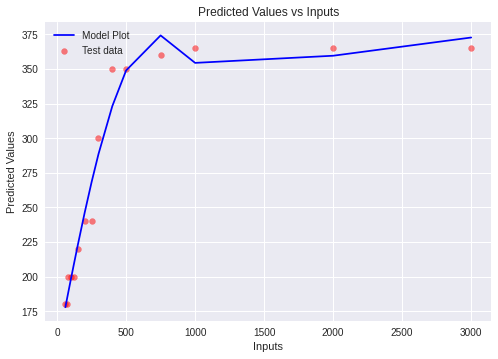

In [18]:
plt.style.use('seaborn')
plt.scatter(X, y, color = 'red', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue', label='Model Plot')
plt.title('Predicted Values vs Inputs')
plt.xlabel('Inputs')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

## Support Vector Regression
**SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data. It uses following constraints-
|y - aX| <= e, Where:**
* e - maximum error
![](https://miro.medium.com/max/1212/1*bSZn9bK43MaA5vVDamRQ2A.png)
The points outside the margin are the Support Vectors.

In [29]:
Training_Dataset = pd.read_csv("https://raw.githubusercontent.com/manojcpatil/PythonDemo/master/Data/regression_train_data.csv")
Training_Dataset = Training_Dataset.dropna()
X_train = np.array(Training_Dataset.iloc[:, :-1].values) # Independent Variable
y_train = np.array(Training_Dataset.iloc[:, 1].values) # Dependent Variable
y_train = y_train.reshape(len(y_train),1)

In [30]:
Testing_Dataset = pd.read_csv("https://raw.githubusercontent.com/manojcpatil/PythonDemo/master/Data/regression_test_data.csv")
Testing_Dataset = Testing_Dataset.dropna()
X_test = np.array(Testing_Dataset.iloc[:, :-1].values) # Independent Variable
y_test = np.array(Testing_Dataset.iloc[:, 1].values) # Dependent Variable
y_test = y_test.reshape(len(y_test),1)

In [41]:
# Scaling X and y
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train.reshape(len(y_train),1))
y_test = sc_y.transform(y_test.reshape(len(y_test),1))

In [42]:
# Training the Model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

d:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [33]:
accuracy = regressor.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.9882837786622037


In [34]:
regressor.predict(X_test).reshape(-1,1)

array([[ 9.32835665e-01],
       [-9.98931376e-01],
       [-9.63295808e-01],
       [-1.03480963e+00],
       [-4.80424381e-01],
       [-1.21683084e+00],
       [ 4.15210181e-01],
       [ 1.53445575e+00],
       [-1.03480963e+00],
       [-1.55252115e+00],
       [-1.57882137e+00],
       [-1.07091680e+00],
       [ 1.56071630e+00],
       [ 4.15210181e-01],
       [-4.80424381e-01],
       [-1.21683084e+00],
       [ 5.18886383e-01],
       [-1.25332738e+00],
       [ 1.28110613e+00],
       [ 6.56895392e-01],
       [ 1.34915107e+00],
       [ 3.55947957e-02],
       [ 1.34915107e+00],
       [-7.88498592e-01],
       [ 1.58511252e+00],
       [ 2.76976228e-01],
       [ 1.00227148e+00],
       [-9.98931376e-01],
       [ 1.47718567e+00],
       [-7.88498592e-01],
       [ 1.62745918e+00],
       [-6.51309155e-01],
       [-5.82992628e-01],
       [ 1.03710155e+00],
       [-7.54065884e-01],
       [-1.02175149e-01],
       [ 1.04496199e-01],
       [ 6.56895392e-01],
       [-7.5

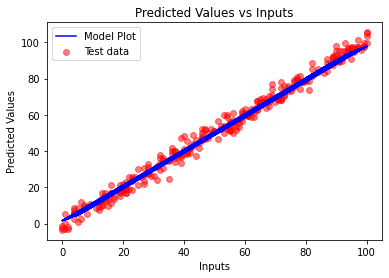

In [35]:
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test), color = 'red', marker = 'o', s = 35, alpha = 0.5, label = 'Test data')
plt.plot(sc_X.inverse_transform(X_test), sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1)),color = 'blue', label='Model Plot')
plt.title('Predicted Values vs Inputs')
plt.xlabel('Inputs')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [43]:
# Training the Model
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

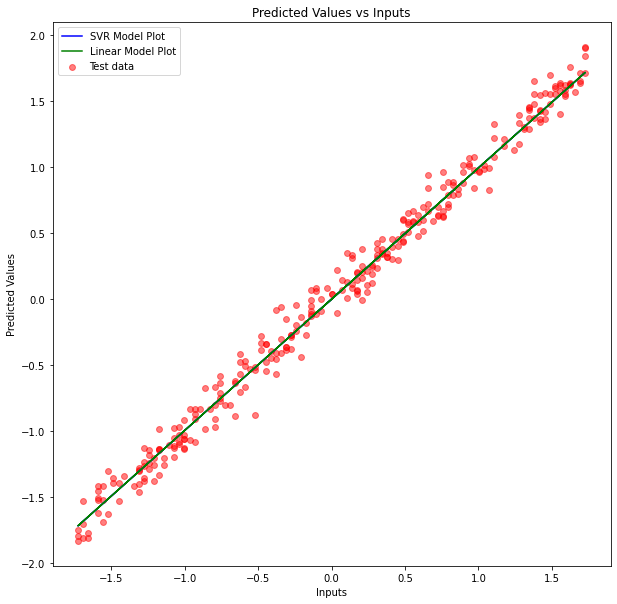

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test), color = 'red', marker = 'o', s = 35, alpha = 0.5, label = 'Test data')
plt.plot(sc_X.inverse_transform(X_test), sc_y.inverse_transform(regressor1.predict(X_test).reshape(-1,1)),color = 'blue', label='SVR Model Plot')
plt.plot(sc_X.inverse_transform(X_test), sc_y.inverse_transform(regressor1.predict(X_test).reshape(-1,1)),color = 'green', label='Linear Model Plot')
plt.title('Predicted Values vs Inputs')
plt.xlabel('Inputs')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

## Decision Tree Regression
**Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.**

In [45]:
Training_Dataset = pd.read_csv("https://raw.githubusercontent.com/manojcpatil/PythonDemo/master/Data/regression_train_data.csv")
Training_Dataset = Training_Dataset.dropna()
X_train = np.array(Training_Dataset.iloc[:, :-1].values) # Independent Variable
y_train = np.array(Training_Dataset.iloc[:, 1].values) # Dependent Variable

In [46]:
Testing_Dataset = pd.read_csv("https://raw.githubusercontent.com/manojcpatil/PythonDemo/master/Data/regression_test_data.csv")
Testing_Dataset = Testing_Dataset.dropna()
X_test = np.array(Testing_Dataset.iloc[:, :-1].values) # Independent Variable
y_test = np.array(Testing_Dataset.iloc[:, 1].values) # Dependent Variable

In [50]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=5,random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [51]:
accuracy = regressor.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.9875321618000479


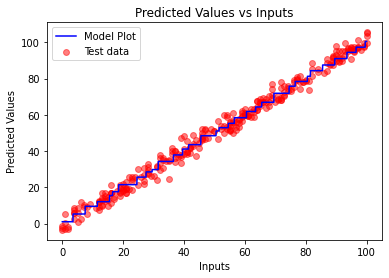

In [52]:
X_grid = np.arange(min(X_test), max(X_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue', label='Model Plot')
plt.title('Predicted Values vs Inputs')
plt.xlabel('Inputs')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

## Random Forest Regression
**Random Forest combines multiple trees to predict the class of the dataset, it is possible that some decision trees may predict the correct output, while others may not. But together, all the trees predict the correct output.**

In [17]:
Training_Dataset = pd.read_csv("https://raw.githubusercontent.com/manojcpatil/PythonDemo/master/Data/regression_train_data.csv")
Training_Dataset = Training_Dataset.dropna()
X_train = np.array(Training_Dataset.iloc[:, :-1].values) # Independent Variable
y_train = np.array(Training_Dataset.iloc[:, 1].values) # Dependent Variable

In [18]:
Testing_Dataset = pd.read_csv("https://raw.githubusercontent.com/manojcpatil/PythonDemo/master/Data/regression_test_data.csv")
Testing_Dataset = Testing_Dataset.dropna()
X_test = np.array(Testing_Dataset.iloc[:, :-1].values) # Independent Variable
y_test = np.array(Testing_Dataset.iloc[:, 1].values) # Dependent Variable

In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [34]:
accuracy = regressor.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.9872205033959207


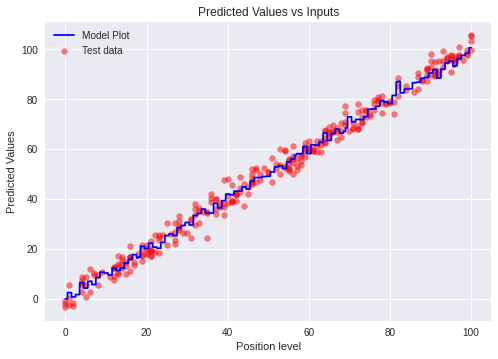

In [35]:
X_grid = np.arange(min(X_test), max(X_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, c = 'red', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue', label='Model Plot')
plt.title('Predicted Values vs Inputs')
plt.xlabel('Position level')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()